> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [6]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [7]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [8]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#import tmdb-movies dataset and print top 5 rows

df_movies = pd.read_csv('tmdb-movies.csv')
#format columns from scientic format into floats with 2 deciaml points
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#read top 5 roaws
df_movies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [9]:
#investigating bottom 5 rows
df_movies.tail(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10862,20379,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,127642.28,0.00


In [10]:
#checking for dimensions in movie dataset
df_movies.shape

(10866, 21)

In [11]:
#next we assess the dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [12]:
#checking for saticatical info about movies dataset
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


<br/>

>From the above statistical information, budget and revenue contain zeros in the min and 25% percentile which will most likely make the distribution skew to zero.

<br/>

>Therefore, we should filter the data using revenue and budget above 0.

In [13]:
#checking nulls
df_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
#Now, lets check for duplicates
df_movies.duplicated().sum()

1


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

## We drop the duplicates

In [15]:
#drop drop duplicates and confirm 
df_movies.drop_duplicates(inplace = True)

df_movies.duplicated().sum()

0

## we drop some columns that do give necessary info about movies

In [16]:
df_movies.drop(['imdb_id', 'homepage', 'tagline'], axis = 1, inplace = True)

df_movies.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


## Change column type 

> For example, release_date from int to date_time

In [17]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

type(df_movies['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
# we convert column budget from into to float
df_movies['budget'] = df_movies['budget'].astype('float')

type(df_movies['budget'][0])

numpy.float64

## Query data where revenue and budget is greater that 0

> On the statistical informiation we noticed min value and 25 percentile on of the data contain revenue budget stated as 0 an assign to new dataframe

> Alternatively, we can drop records whose revenue is 0 since its an indication that they were not recoreded


In [19]:
df_new = df_movies.query('revenue > 0 & budget > 0')

df_new.head(2)


,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.99,150000000.00,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52
1,76341,28.42,150000000.00,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939.28,348161292.49


In [20]:
df_new.shape

(3854, 18)

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   int64         
 4   original_title        3854 non-null   object        
 5   cast                  3850 non-null   object        
 6   director              3853 non-null   object        
 7   keywords              3716 non-null   object        
 8   overview              3854 non-null   object        
 9   runtime               3854 non-null   int64         
 10  genres                3854 non-null   object        
 11  production_companies  3808 non-null   object        
 12  release_date          3854 non-null   datetime64[ns]
 13  vote_count       

In [22]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




In [23]:
columns = df_movies.columns
for i, v in enumerate(columns):
    print(i, v)

0 id
1 popularity
2 budget
3 revenue
4 original_title
5 cast
6 director
7 keywords
8 overview
9 runtime
10 genres
11 production_companies
12 release_date
13 vote_count
14 vote_average
15 release_year
16 budget_adj
17 revenue_adj


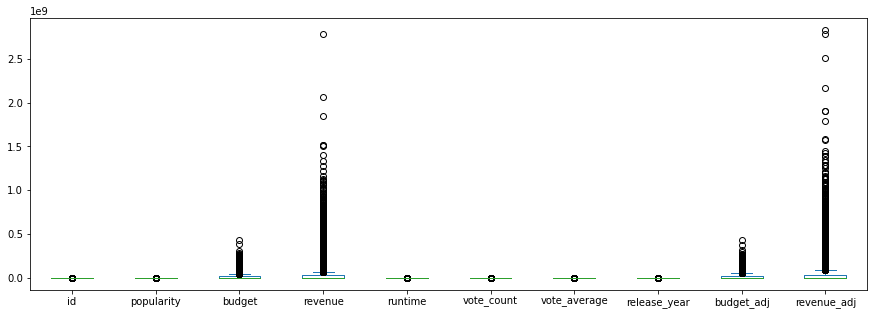

In [24]:
#first lets check the distribution of data in numerical features without filtering 0s in revenue and budget using boxplot

df_movies_v1 = df_movies.iloc[:, np.r_[0:12, 13:18]]

df_movies_v1.columns
df_movies_v1.plot(kind = 'box',figsize = (15,5));

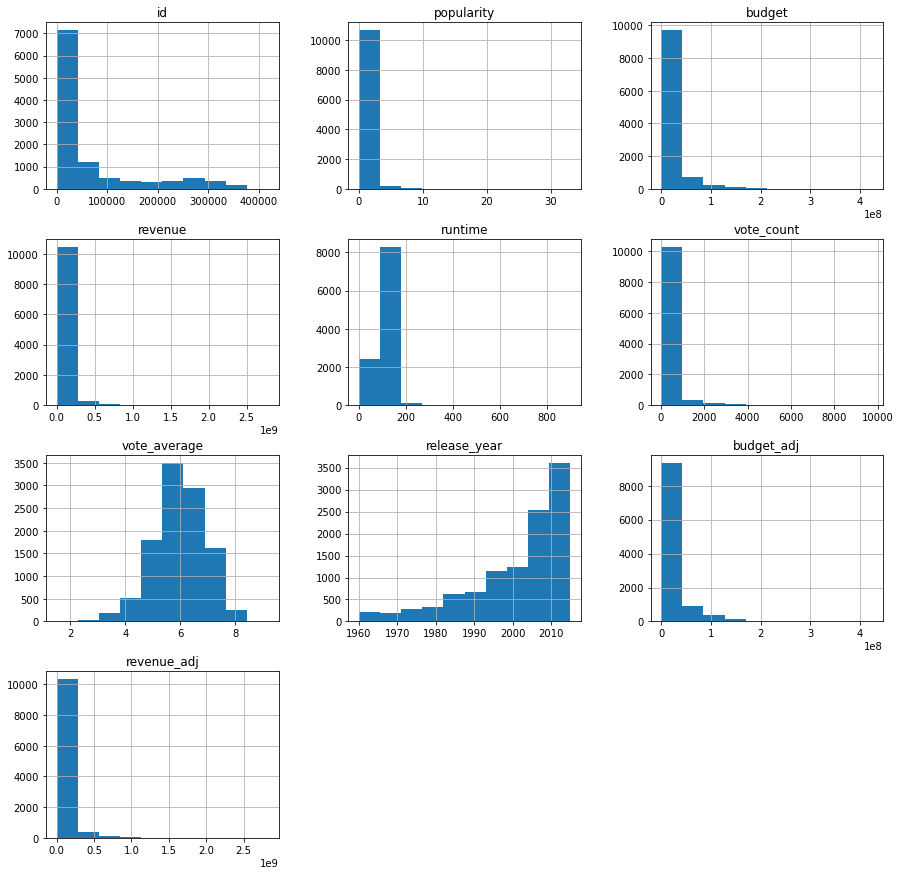

In [25]:
#check the distribution of data in numerical features without filtering 0s in revenue and budget using histogram
df_movies_v1.hist(figsize = (15,15));

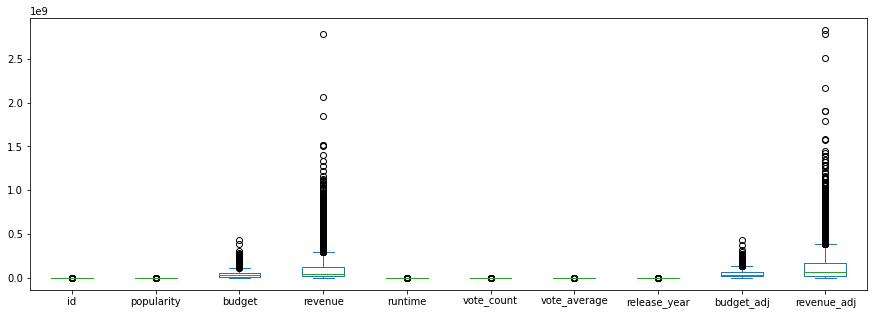

In [26]:
#Now check the distribution of data in numerical features while filtering 0s in revenue and budget
df_movies_v2 = df_new.iloc[:, np.r_[0:12, 13:18]]

df_movies_v2.columns
df_movies_v2.plot(kind = 'box',figsize = (15,5));

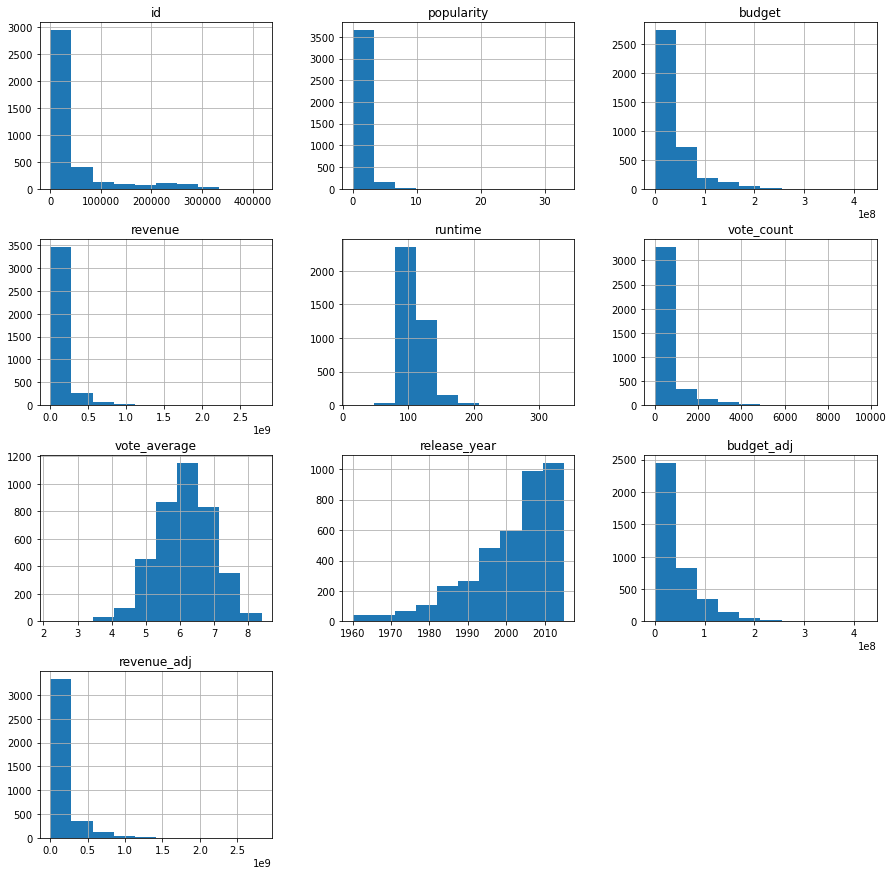

In [27]:
#check the distribution of data in numerical features while filtering 0s in revenue and budget using histogram
df_movies_v2.hist(figsize = (15,15));

### Research Question 1 (What is the trend of movie released?)
>For this reaserch quetsion, we dont require to have revenue and budget values, thererfore we can use the dataframe without filtering where revenue and budget are zeros

Steps: 
- we count the id grouped by release date
- Plot a line graph of the counts against year

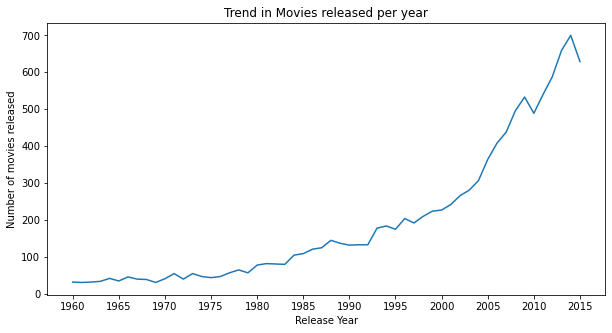

In [28]:
#we count the id grouped by release year
count_peryear = df_movies.groupby('release_year')['id'].count()
label = np.arange(1960, 2020, 5)

#plot a line graph to visualize the trend in number of movies released over time
df_movies.groupby('release_year')['id'].count().plot(kind = 'line', xticks = label ,figsize =(10,5))
plt.title('Trend in Movies released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of movies released');

## Conclusions: Trend in number of movies released 
> we have had an exponentially increasing trend in the number of movies released with time.
<br/>
> So, let confirms the trend of mean revenue genereated with time 

### Research Question 2 (What is the trend in revenue generated vs budget per year?)

C:\Users\njeriw\AppData\Local\Temp/ipykernel_14364/1869575198.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_peryear = df_movies.groupby('release_year')['revenue', 'budget'].mean()
C:\Users\njeriw\AppData\Local\Temp/ipykernel_14364/1869575198.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_movies.groupby('release_year')['revenue', 'budget'].mean().plot(xticks = label ,figsize =(10,5))


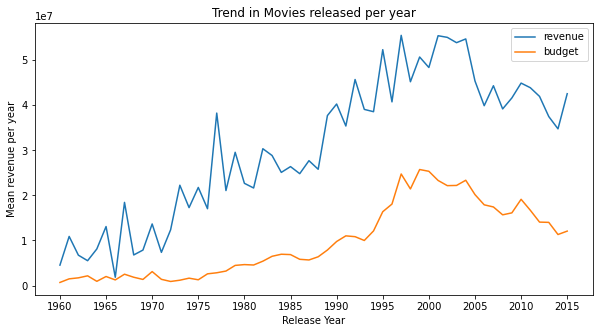

In [29]:
#we get revenue and budget per ,year
revenue_peryear = df_movies.groupby('release_year')['revenue', 'budget'].mean()
label = np.arange(1960, 2020, 5)

#plot a line graph to visualize the trend over time
df_movies.groupby('release_year')['revenue', 'budget'].mean().plot(xticks = label ,figsize =(10,5))
plt.title('Trend in Movies released per year')
plt.xlabel('Release Year')
plt.ylabel('Mean revenue per year');

## Conclusion:
<br/>
Both revenue and budget have been increasing expontiall with time until between 2000 and 2005 where we get a drop

### Research Question 3 (what are top 10 movies in revenue generated?)

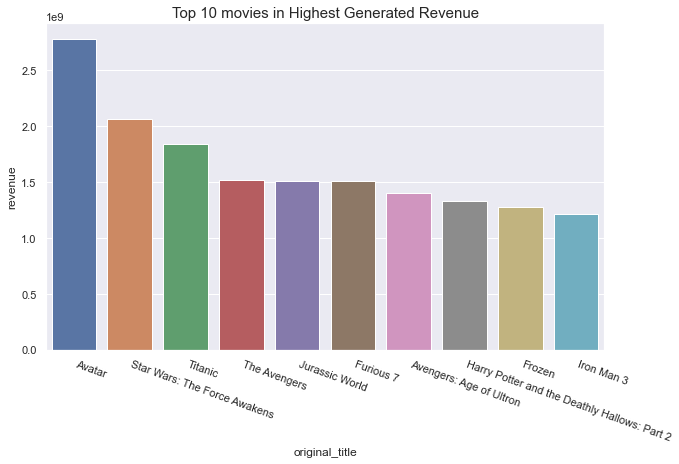

In [30]:
#we sort the revenue in descending order and visualize only top 10 movies
cols_revenue= ['original_title', 'revenue']
revenue_df = df_new.sort_values('revenue', ascending= False)[cols_revenue].set_index('original_title')
top10 = revenue_df.head(10)

#plot the top 10 records
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(data=top10, x=top10.index, y='revenue')
plt.xticks(ha='left', rotation=-20)
plt.title('Top 10 movies in Highest Generated Revenue', fontsize = 15);

## Conclusions:
<br/>
Avatar takes lead in the revenue generated in the entire period.
<br/>
We can confirm if its the case in profit

### Research Question 4  (what are top 10 movies in profit generated?

C:\Users\njeriw\AppData\Local\Temp/ipykernel_14364/3277861543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['profit'] = df_new['revenue'] - df_new['budget']


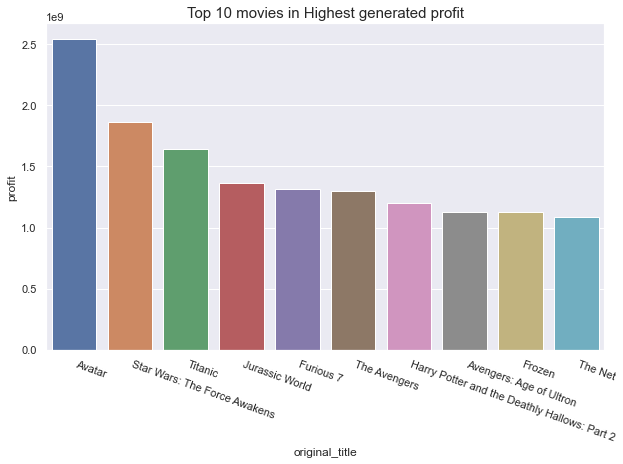

In [31]:
#calculate profit 
df_new['profit'] = df_new['revenue'] - df_new['budget']

df_profit = df_new.sort_values('profit', ascending= False)

cols_profit= ['original_title', 'profit']

profit_df = df_profit.sort_values('profit', ascending= False)[cols_profit].set_index('original_title')
top10_profit=profit_df.head(10)

#plot the top 10 records
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(x=top10_profit.index, y='profit', data=top10_profit)
plt.xticks(ha='left', rotation=-20)
plt.title('Top 10 movies in Highest generated profit', fontsize = 15);

## Conclusions:
<br/>
Avatar takes lead in the revenue generated in the profit generated as well

### Research Question 4  (what are the characteristics of best rated movie?

In [32]:
df_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [33]:
# We will query movies above the mean voting_average
df_ratings = df_movies.query('vote_average >= vote_average.mean()')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
#get statitical info about the movies rated above mean vote average
df_ratings.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5810.00,5810.00,5810.00,5810.00,5810.00,5810.00,5810.00,5810.00,5810.00,5810.00
mean,60425.57,0.79,16427332.56,55311962.62,105.99,320.52,6.66,1999.94,19946417.53,72967916.07
std,89138.66,1.27,34180498.08,146237578.27,38.80,743.55,0.51,13.68,37379277.03,181744622.19
min,5.00,0.00,0.00,0.00,0.00,10.00,6.00,1960.00,0.00,0.00
25%,9656.00,0.22,0.00,0.00,92.00,20.00,6.20,1992.00,0.00,0.00
50%,17188.50,0.43,21.00,65260.50,103.00,53.00,6.60,2005.00,28.23,67190.53
75%,63577.00,0.89,18000000.00,40992417.25,118.00,245.00,7.00,2011.00,25324298.18,60245185.88
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [34]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])